## Convnets
Width and height dimensions tend to shrink as go deeper into the network. Number of channels controlled by first argument passed to Conv2d layers (32 or 64)

Last step: Feed last output tensor (shape (3,3,64) into densely connected classifier network. Stack of Dense layers. These classifiers process vectors (1D) whereas the current output is a 3d tensor. First need to flatten the 3d outputs into 1D and then add a few Dense layers on top

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

Last step: Feed last output tensor (shape (3,3,64) into densely connected classifier network. Stack of Dense layers. These classifiers process vectors (1D) whereas the current output is a 3d tensor. First need to flatten the 3d outputs into 1D and then add a few Dense layers on top

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.1729 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0475 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0322 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0188 - accuracy: 0.9941


Evaluate on Test Data:

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9924


0.9923999905586243

# 5.2 Cats & Dogs

Create train, validation and test folders

In [6]:
import os, shutil
original_dataset_dir = './datasets/catsvdogs/train/train'
base_dir = './datasets/catsvdogssmall'

In [4]:


os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')

os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')

os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')

os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')

os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')

os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')

os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(test_dogs_dir)




In [7]:
# cat images
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

# copies first 1000 cat images to train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

# copies next 500 cat images to validation_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

# copies next 500 cat images to test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)



In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

# copies first 1000 dog images to train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

# copy dog images to validation
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

# copy dog images to test
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# check length of datasets in each folder
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Building network
Use similar structure to first network but have bigger images + more complex problem network will have to be larger.  
Will have one more Conv2D + MaxPooling2D stage  
- Augments capacity of network
- Reduces size of feature maps so not overly large when reach ```Flatten``` layer  

Start with 150x150 (arbitrary) => end with feature maps of 7x7 before ```Flatten```

**Note** depth of feature map increases through network (32 -> 128) while feature map size decreases (148x148 to 7x7). This is a normal feature of convnets.  

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-4),
            metrics=['acc'])

### Preprocessing  
Data needs to be preprocesed into floating point tensors before being fed into network  
Currenty Jpeg
1. Read picture files
2. decode jpeg to rgb grids of pixels
3. convert to flooating point tenors
4. rescale pixel values (between 0 and 255) to the [0,1] interval  

Use keras utilities

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # target directory
    train_dir,
    # resize images to 150 x 150
    target_size=(150, 150),
    batch_size=20,
    # using binary crossentropy loss so need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Python generator: yields batchse of 150x150 RGB images (shape(20,150,150,3)) and binary labels (shape(20,))  
20 samples in each batch  
Generator will loop indefinitely, need to berak iteration at somepoint  

Fit model to data using generator using the ```fit_generator``` method

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/15


C:\Users\hugho\AppData\Local\Temp\ipykernel_24668\1045494962.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 59s 591ms/step - loss: 0.6611 - acc: 0.6035 - val_loss: 0.6483 - val_acc: 0.6060
Epoch 2/15
100/100 [==============================] - 59s 591ms/step - loss: 0.6240 - acc: 0.6405 - val_loss: 0.6154 - val_acc: 0.6400
Epoch 3/15
100/100 [==============================] - 60s 600ms/step - loss: 0.5795 - acc: 0.6930 - val_loss: 0.6146 - val_acc: 0.6460
Epoch 4/15
100/100 [==============================] - 59s 591ms/step - loss: 0.5374 - acc: 0.7255 - val_loss: 0.5817 - val_acc: 0.6830
Epoch 5/15
100/100 [==============================] - 58s 579ms/step - loss: 0.5117 - acc: 0.7455 - val_loss: 0.5900 - val_acc: 0.6910
Epoch 6/15
100/100 [==============================] - 65s 649ms/step - loss: 0.4926 - acc: 0.7595 - val_loss: 0.5477 - val_acc: 0.7100
Epoch 7/15
100/100 [==============================] - 57s 574ms/step - loss: 0.4661 - acc: 0.7730 - val_loss: 0.5414 - val_acc: 0.7110
Epoch 8/15
100/100 [==============================] - 60s 596ms/st

In [19]:
model.save('cats_and_dogs_small_1.h5')


Plot loss and accuracy over training and validation data during training

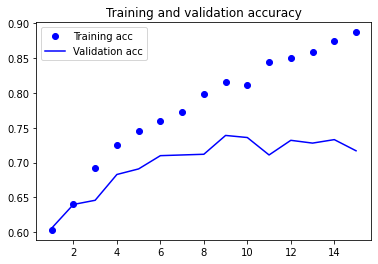

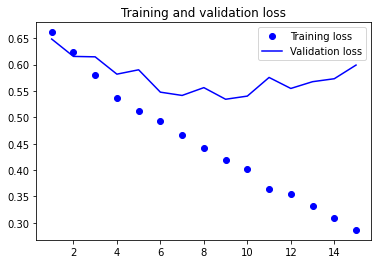

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Plots show overfitting.  
With few training samples, overfitting biggest challenge.  
Use **Data Augmentation** to help with overfitting, used when processing images with DL models

#### Data Augmentiation  
Generate more training data from existing training samples via random transformations yielding believable looking images 

Keras: configure # of random transformations to be performed using ```ImageDataGenerator```

In [21]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [22]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# choose one image to augment
img_path = fnames[3]

# reads image and resizes it
img = image..load_img(img_path, target_size=(150, 150))

#convert to numpy array with shape (150,150,3)
x = image.img_to_array(img)
# reshape to 1,150,150,3)
x = x.reshape((1,) + x.shape)




AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

Generates batches of randmoly transformed images.  
Loops indefinetyl, need to break the loop. 

In [ ]:
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Network will never see same image twice, however images will be correlated. Still might not be enough to completely fight overfitting.  

To further fight overfitting add dropout layer.



In [ ]:
# new model with data augmentation and dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

train network using data augmentation and dropout

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# validation data should NOT be augmented
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    # target directory
    train_dir,
    # resize images to 150x150
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

In [ ]:
# save model for use in section 5.4
model.save('cats_and_dogs_small_2.h5')


Plot results

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()